In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

# EXEMPLOS BIBLIOTECA EDSON

ToDo:

- Implementar elemento 1D ( class LinearLineEdson() ) [elements.py]
- Implementar malha 1D ( class PointElectrodes1DMeshEdson() ) [mesh.py]
- Rodar exemplos 1D antigos e ver se bate
- Implementar problema direto (que deve funcionar com qualquer malha, não interessa se é 1D, 2D, com ou sem eletrodo...) [forward.py]

## Teste Tarefa unidimensional 
(class PointElectrodes1DMeshEdson()).

In [ ]:
nome = '../../malhasMSH/unidimensional_100T_dif_py.msh'
#nome = '../../malhasMSH/unidimensional_4e_py.msh'

noh_eletrodos = [0,  10, 20, 30, 40, 50, 60, 70, 80, 90,  100]
#noh_eletrodos = [0,  1, 2, 3, 4]

MinhaMalha1D = mesh.PointElectrodes1DMeshEdson(noh_eletrodos, nome_msh=nome, altura2D = 0.001)
MinhaMalha1D.ReadMesh()


meus_sigmas = {}
meus_sigmas[1] = 0.25
meus_sigmas[2] = 0.5
MinhaMalha1D.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

sigma_inicial = np.full(MinhaMalha1D.NumberOfElements, 0.50)          # Monta vetor sigma inicia

amplitude_corrente = 0.001
Pcorrente = np.zeros(MinhaMalha1D.NumberOfNodes)                    # Monta vetor de corrente
Pcorrente[0] = -amplitude_corrente                            # Nó de saída de corrente
Pcorrente[MinhaMalha1D.NumberOfElements] = amplitude_corrente                  # Nó de entrada de corrente    

fwd = forwardProblem.forward_problem(MinhaMalha1D, Pcorrente=Pcorrente)   # __init__ roda aqui

fwd.Solve()

#plt.plot(fwd.Vmedido)
print(f'Vmedido \n {fwd.Vmedido.shape}')
nome_arquivo = 'unidimensional_100e_py'

N_padraoCC = 1

##fwd.criar_arquivo_pos_2D(N_padraoCC, fwd.Vmedido, nome_arquivo)
#fwd.criar_arquivo_pos_2D(fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)


V_measured = fwd.Vmedido_eletrodos
invProblem = inverseProblem.inverse_problem(MinhaMalha1D, Pcorrente=Pcorrente, debug=1)
invProblem.solve(sigma_inicial, V_measured)
#print('Y_jacobian',invProblem.Y_jacobian)

In [ ]:
invProblem.Y_Vcalc

## Testes com HUA

In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

nome = '../../malhasMSH/circ2_tst_Hua_v2_2_lc_especial.msh'
#nome = '../../malhasMSH/circ8_anom4_tst_Hua_v4_1_lc_0_01.msh'

#MinhaMalha = mesh.HuaElectrodes2DMeshEdson(8, nome_msh=nome, altura2D = 0.02)
MinhaMalha = mesh.HuaElectrodes2DMeshEdson(2, nome_msh=nome, altura2D = 0.02)
MinhaMalha.ReadMesh() 

print(MinhaMalha.Elements[2])
print(f"Centroid: {MinhaMalha.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalha.Elements[2].KGeo}")


meus_sigmas = {
1000 : 0.1,    
#1001 : 0.01,
5001 : 0.2, 
5002 : 0.2, 
#5003 : 0.2, 
#5004 : 0.2, 
#5005 : 0.2, 
#5006 : 0.2, 
#5007 : 0.2, 
#5008 : 0.2,  
}

MinhaMalha.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

#MinhaMalha.CalcKGlobal() # calculando KGlobal usando Sigmas

#coordenadas = MinhaMalha.Coordinates
#topologia = MinhaMalha.msh_topology

#MinhaMalha.KGlobal

#KGlobal =  MinhaMalha.KGlobal


print(f'n_nodes = {MinhaMalha.NumberOfNodes}')


fwd = forwardProblem.forward_problem(MinhaMalha, Pcorrente=None, SkipPattern=0, VirtualNode = True)   # __init__ roda aqui


print(f'Pcorrente \n {fwd.corrente[MinhaMalha.NumberOfNodes-MinhaMalha.NumberOfElectrodes: MinhaMalha.NumberOfNodes]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ8_anom4_tst_Hua_v4_1_lc_0_01'
#fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

V_measured = fwd.Vmedido_eletrodos

print(f'V_mesured \n {V_measured}')


invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalha, Pcorrente=fwd.corrente)
invProblem_2D.solve(V_measured, initialEstimate=2.9,alpha =2.5,  Lambda = 0.50, max_iter=1,Tol=5.0e-4)
#print('Y_jacobian',invProblem.Y_jacobian)


# TESTE COM eletrodo pontual

In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

nome = '../../malhasMSH/circ16_anomalia6.msh'

MinhaMalhaPto = mesh.PointElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto.ReadMesh() 

print(MinhaMalhaPto.Elements[2])
print(f"Centroid: {MinhaMalhaPto.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalhaPto.Elements[2].KGeo}")

meus_sigmas = {
1000 : 0.1,    
1001 : 0.01,
10001 : 0.2,
10002 : 0.2, 
10003 : 0.2, 
10004 : 0.2, 
10005 : 0.2, 
10006 : 0.2, 
10007 : 0.2, 
10008 : 0.2, 
10008 : 0.2, 
10010 : 0.2, 
10011 : 0.2, 
10012 : 0.2, 
10013 : 0.2, 
10014 : 0.2, 
10015 : 0.2, 
10016 : 0.2,  
}

MinhaMalhaPto.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto.CalcKGlobal() # calculando KGlobal usando Sigmas


print(f'MinhaMalhaPto.KGlobal =  {MinhaMalhaPto.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto, Pcorrente=None, SkipPattern=3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
print(f'Pcorrente \n {fwd.corrente[:16]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ16_anomalia6'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

# TESTE com eletrodo pontual mesh 4 elementos

## Regularização Filtro Gaussiano FP_Alta

fonte: Erick equação C.37

$$
\hat{\theta}_{k+1} = \hat{\theta}_k + \alpha_k
\left( J_k^T W_1 J_k + \lambda^2 L_2^T L_2 \right)^{-1}
\cdot \left( J_k^T W_1 (z - h(\hat{\theta}_k)) - \lambda^2 L_2^T L_2 (\hat{\theta}_k - \theta^*) \right)
$$
onde,
$$W_1=L_1^T L_1$$

In [ ]:
# %%time
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

###############################################################################
#nome = '../../malhasMSH/quatro_triangulos_03nov2025.msh'
#nome = '../../malhasMSH/circ16_3_anomalia6_v2208.msh'
nome = '../../malhasMSH/dezesseis_triangulos_22jan25.msh'
#nome = '../../malhasMSH/circ16_3_anomalia6_coarse_v2208.msh'


MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
#MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto2.ReadMesh() 

#print(MinhaMalhaPto2.Elements[2])
#print(f"Centroid: {MinhaMalhaPto2.Elements[2].Centroid}")
#print(f"KGeo: \n{MinhaMalhaPto2.Elements[2].KGeo}")
#sigma_inicial = np.full(MinhaMalhaPto2.NumberOfElements, 1.0)          # Monta vetor sigma inicial
#PcorrenteReal = np.loadtxt("padraoCC_3objetos.txt")


meus_sigmas = {
1000 : 3.0,   
1001 : 2.0}#,
#1002 : 2.0,
#1003 : 2.0}


MinhaMalhaPto2.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto2.CalcKGlobal() # calculando KGlobal usando Sigmas


#print(f'MinhaMalhaPto2.KGlobal =  {MinhaMalhaPto2.KGlobal.shape}')

#fwd = forwardProblem.forward_problem(MinhaMalhaPto2, Pcorrente=PcorrenteReal, SkipPattern=None, I =1.0e-3)   # __init__ roda aqui
fwd = forwardProblem.forward_problem(MinhaMalhaPto2, Pcorrente=None, SkipPattern=0, I =1.0e-3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
#print(f'Pcorrente \n {fwd.corrente[:16]}')

#print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
#print(f'Vmedido \n {fwd.Vmedido[:,0]}')

#nome_arquivo = 'ParaVernoGmshPto'
nome_arquivo = 'banana'
#fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

#print(f'self.Yinversa banana\n {fwd.Yinversa}')

V_measured = fwd.Vmedido_eletrodos


print(f'V_mesured \n {V_measured.shape}')

Reading ../../malhasMSH/quatro_base_22jan25.msh.

msh_physical_groups found (type triangle): [1000 1000 1000 1000].
Physical tags found: [1000].
Physical tags points: [10000 10001 10002 10003 10004]
4 electrodes found.
MSH file with 4 elements and 5 nodes.
ElectrodeNodes: [0 1 2 3]
GndNode: 4
0.03577559663844664 - 0.009953358538713581 - 0


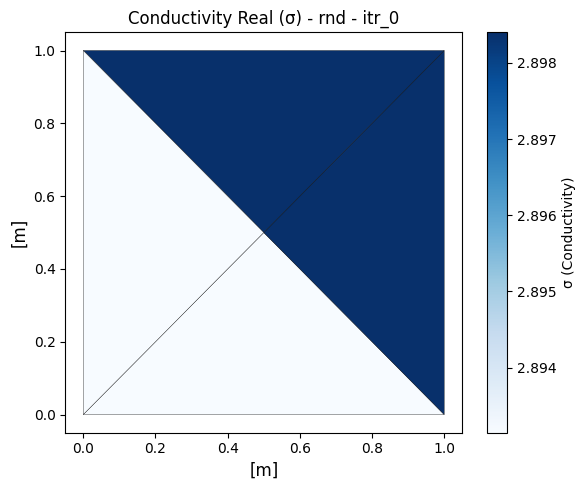

0.03569870031842947 - 0.009887922590111823 - 1
0.035621997136568384 - 0.009823094820874479 - 2
0.03554548666367635 - 0.009758868002711406 - 3
0.035469168470792546 - 0.009695235008122473 - 4
0.03539304212920245 - 0.009632188811300409 - 5
0.035317107210445564 - 0.00956972248531399 - 6
0.03524136328632273 - 0.009507829199118236 - 7
0.035165809928924485 - 0.00944650221877 - 8
0.0350904467106306 - 0.009385734904314045 - 9
0.03501527320412173 - 0.009325520707416388 - 10
0.03494028898240029 - 0.009265853172108521 - 11
0.03486549361879431 - 0.009206725931116155 - 12
0.034790886686976295 - 0.009148132706056678 - 13
0.0347164677609673 - 0.009090067305189978 - 14
0.03464223641515183 - 0.009032523622636098 - 15
0.03456819222428454 - 0.008975495636432336 - 16
0.0344943347635029 - 0.008918977406548352 - 17
0.03442066360834531 - 0.00886296307582626 - 18
0.03434717833474987 - 0.008807446866555008 - 19
0.03427387851907026 - 0.008752423080206604 - 20
0.03420076373808147 - 0.008697886095717705 - 21
0.034

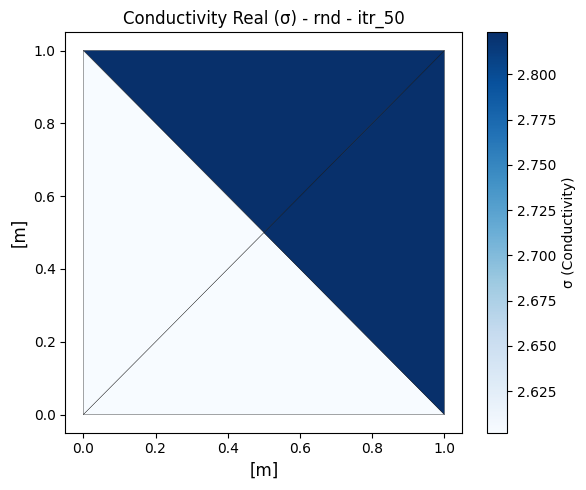

0.03209128202590336 - 0.0072631287623651525 - 51
0.032023696109156015 - 0.007221267810305412 - 52
0.03195628195689482 - 0.007179748445436243 - 53
0.031889039164217585 - 0.007138567040707209 - 54
0.03182196732687967 - 0.007097720015736999 - 55
0.031755066041298276 - 0.007057203835226358 - 56
0.03168833490455641 - 0.007017015010088243 - 57
0.031621773514399605 - 0.006977150094406745 - 58
0.031555381469247176 - 0.0069376056854638535 - 59
0.03148915836820292 - 0.0068983784249844774 - 60
0.03142310381104277 - 0.006859464996307953 - 61
0.03135721739822899 - 0.006820862124431574 - 62
0.03129149873091115 - 0.00678256657532147 - 63
0.03122594741093366 - 0.0067445751559554465 - 64
0.031160563040835792 - 0.006706884713505866 - 65
0.031095345223849387 - 0.0066694921345354366 - 66
0.031030293563907276 - 0.006632394343330322 - 67
0.030965407665652672 - 0.006595588303248996 - 68
0.03090068713443654 - 0.006559071016355172 - 69
0.03083613157631108 - 0.0065228395202949424 - 70
0.030771740598049244 - 0.0

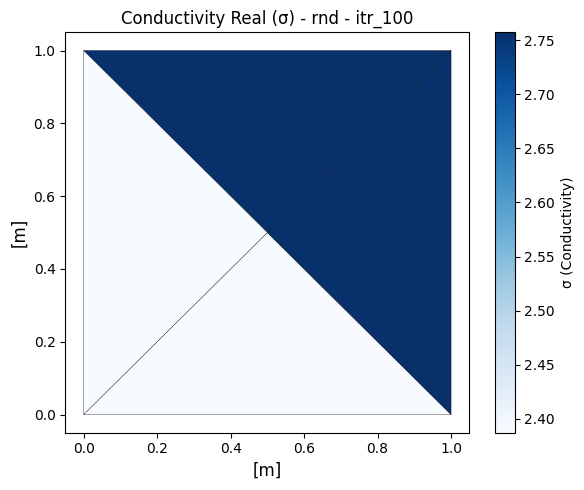

0.02891462031728348 - 0.005526822531515731 - 101
0.028855140270772194 - 0.00549836996141334 - 102
0.02879581261033356 - 0.005470123245937329 - 103
0.028736636967380273 - 0.005442080421837945 - 104
0.02867761297408397 - 0.005414239547101018 - 105
0.028618740263395347 - 0.005386598704183077 - 106
0.028560018469023493 - 0.005359155996030683 - 107
0.028501447225453815 - 0.005331909549203516 - 108
0.02844302616793254 - 0.005304857510054593 - 109
0.028384754932485285 - 0.005277998048011332 - 110
0.02832663315589875 - 0.005251329352349223 - 111
0.02826866047573535 - 0.005224849633766362 - 112
0.02821083653032439 - 0.0051985571230142935 - 113
0.028153160958770494 - 0.005172450071276705 - 114
0.028095633400947943 - 0.005146526750055295 - 115
0.028038253497500675 - 0.005120785449977318 - 116
0.02798102088984569 - 0.005095224481610356 - 117
0.027923935220169314 - 0.0050698421746953985 - 118
0.02786699613142722 - 0.005044636876718282 - 119
0.027810203267356542 - 0.005019606956065793 - 120
0.027753

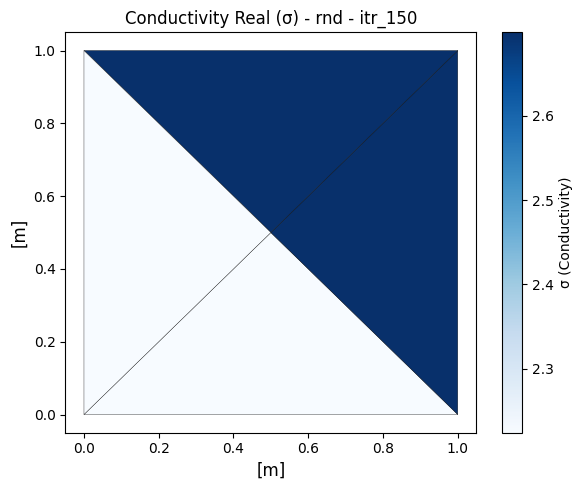

0.02612024382463953 - 0.004322549961671652 - 151
0.026067946644355057 - 0.004302370020739639 - 152
0.026015784362862313 - 0.004282320623161952 - 153
0.025963756649911466 - 0.004262400645811486 - 154
0.025911863176015505 - 0.004242608978786362 - 155
0.025860103612432832 - 0.0042229445231384355 - 156
0.02580847763117637 - 0.004203406191714088 - 157
0.025756984905009758 - 0.00418399290890429 - 158
0.025705625107447047 - 0.004164703609797215 - 159
0.025654397912759086 - 0.00414553724235028 - 160
0.025603302995951635 - 0.0041264927638114315 - 161
0.025552340032787172 - 0.004107569142750467 - 162
0.02550150869977877 - 0.0040887653599393295 - 163
0.02545080867417078 - 0.004070080404414752 - 164
0.025400239633968043 - 0.004051513277827491 - 165
0.025349801257909962 - 0.004033062990983726 - 166
0.025299493225484495 - 0.0040147285658603486 - 167
0.02524931521691477 - 0.003996509033943413 - 168
0.02519926691316739 - 0.003978403436918262 - 169
0.0251493479959489 - 0.003960410826692336 - 170
0.0250

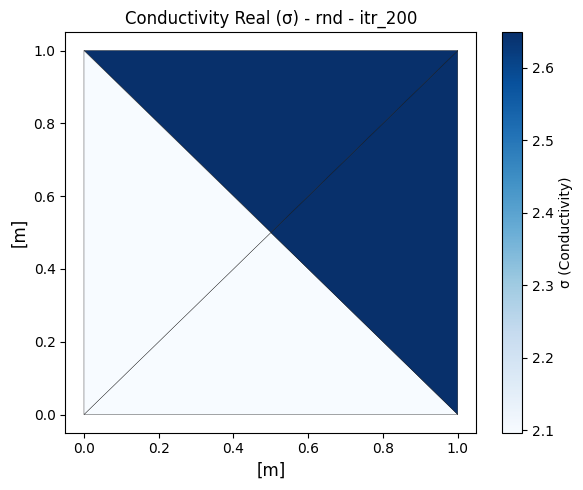

0.023664334587462 - 0.0034539299531664808 - 201
0.02361839234409247 - 0.0034391056726311626 - 202
0.02357256939069956 - 0.0034243679334929615 - 203
0.02352686543342241 - 0.0034097160625013003 - 204
0.02348128017909566 - 0.003395149393757568 - 205
0.023435813335236422 - 0.0033806672659345777 - 206
0.023390464610068513 - 0.0033662690253492165 - 207
0.023345233712504534 - 0.003351954024707919 - 208
0.023300120352143405 - 0.003337721622508301 - 209
0.02325512423927495 - 0.003323571183374049 - 210
0.023210245084879462 - 0.003309502078024687 - 211
0.023165482600626695 - 0.003295513684005665 - 212
0.023120836498863286 - 0.003281605384039166 - 213
0.023076306492622572 - 0.003267776566795673 - 214
0.023031892295622147 - 0.003254026627290829 - 215
0.022987593622255612 - 0.003240354965400839 - 216
0.022943410187603916 - 0.00322676098794567 - 217
0.022899341707416757 - 0.0032132441062764656 - 218
0.02285538789812645 - 0.003199803737221191 - 219
0.02281154847684757 - 0.0031864393046804646 - 220
0.0

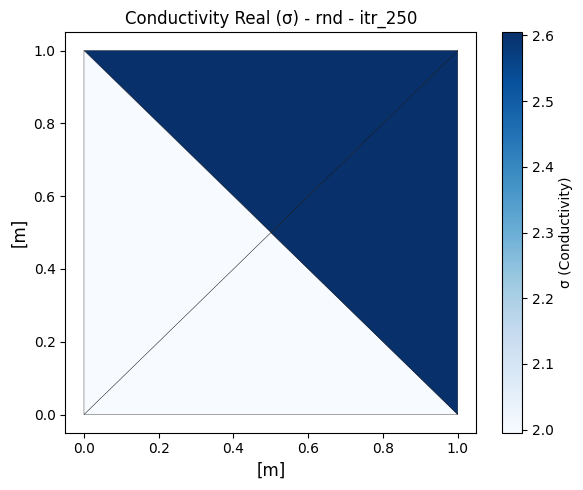

0.021507750260616795 - 0.002806894244963962 - 251
0.021467425854659657 - 0.0027956850441920853 - 252
0.021427206870778582 - 0.002784535461219122 - 253
0.021388051137294948 - 0.002773717947378428 - 254
0.021381005213897623 - 0.002772061591580654 - 255
0.02137398339124168 - 0.0027704155608502543 - 256
0.021366985580601808 - 0.00276877978616508 - 257
0.021360011693596158 - 0.0027671542007594294 - 258
0.02135306164217161 - 0.0027655387363625414 - 259
0.0213461353386166 - 0.0027639333259366333 - 260
0.021339232695557236 - 0.002762337903201448 - 261
0.02133235362594943 - 0.0027607524025283874 - 262
0.021325498043085776 - 0.0027591767570656965 - 263
0.02131866586058869 - 0.0027576109023899793 - 264
0.021311856992410397 - 0.0027560547741559945 - 265
0.02130507135283285 - 0.0027545083070641243 - 266
0.021298308856467767 - 0.002752971438335998 - 267
0.021291569418250625 - 0.0027514441031741463 - 268
0.021284852953445548 - 0.0027499262401836544 - 269
0.02127815937763934 - 0.0027484177856137736 - 

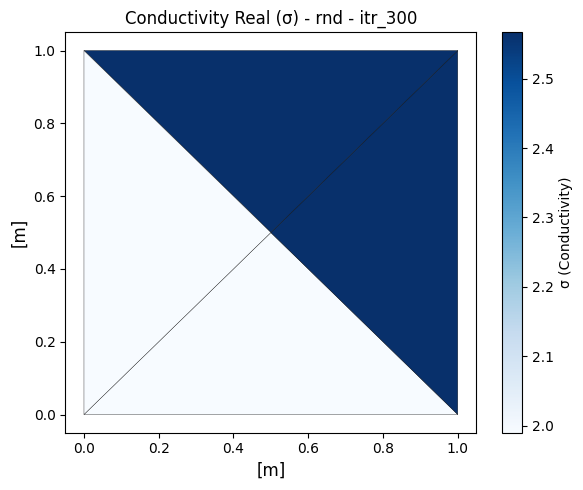

0.02108156557959208 - 0.0027060000038984992 - 301
0.02107556176191938 - 0.0027047620095810593 - 302
0.02106957822200652 - 0.002703531581625387 - 303
0.02106361488578693 - 0.002702308670320557 - 304
0.02105767167947409 - 0.0027010932264484263 - 305
0.021051748529568013 - 0.002699885201059207 - 306
0.021045845362852863 - 0.002698684545456246 - 307
0.021039962106389736 - 0.0026974912113776977 - 308
0.021034098687524073 - 0.002696305150925431 - 309
0.02102825503387643 - 0.0026951263166936613 - 310
0.021022431073348922 - 0.0026939546612919237 - 311
0.021016626734121854 - 0.002692790136982986 - 312
0.021010841944651325 - 0.002691632698650777 - 313
0.021005076633664903 - 0.0026904822985125507 - 314
0.020999330730167985 - 0.002689338892064715 - 315
0.02099360416343848 - 0.0026882024315134194 - 316
0.02098789686302831 - 0.0026870728736181496 - 317
0.02098220875875412 - 0.0026859501722416483 - 318
0.02097653978070757 - 0.0026848342823158028 - 319
0.02097088985924902 - 0.002683725160162441 - 320


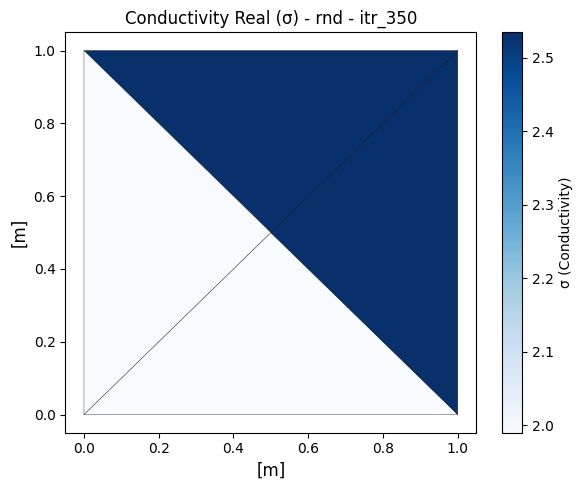

0.020804826551020197 - 0.002652469877087301 - 351
0.0207997512273134 - 0.002651555552896648 - 352
0.020794692806434145 - 0.002650646686768906 - 353
0.020789651227299564 - 0.0026497432435996855 - 354
0.020784626429064486 - 0.0026488451880033103 - 355
0.020779618351113024 - 0.0026479524856927506 - 356
0.020774626933067607 - 0.0026470651017379775 - 357
0.020769652114778603 - 0.002646183002053283 - 358
0.020764693836332362 - 0.002645306152361769 - 359
0.020759752038040858 - 0.0026444345189793293 - 360
0.020754826660451652 - 0.0026435680681245466 - 361
0.02074991764433557 - 0.0026427067667576447 - 362
0.02074502493069376 - 0.0026418505812413357 - 363
0.02074014846075508 - 0.002640999478917153 - 364
0.02073528817597247 - 0.0026401534273013654 - 365
0.02073044401802611 - 0.002639312393411472 - 366
0.020725615928821765 - 0.002638476345135155 - 367
0.020720803850486205 - 0.0026376452506780726 - 368
0.020716007725367414 - 0.0026368190779102797 - 369
0.020711227496038757 - 0.002635997795560186 - 

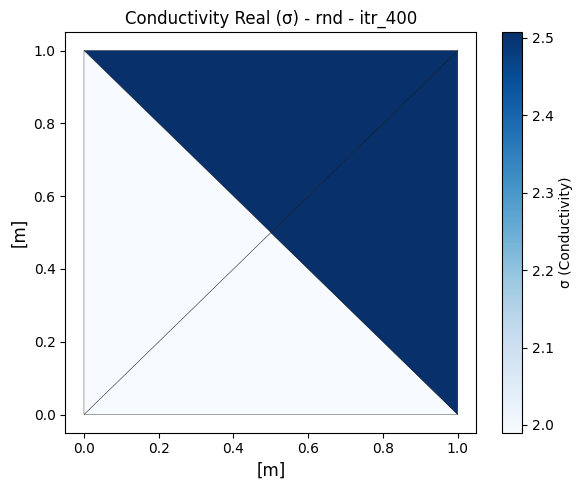

0.020570621380708098 - 0.002612800588680534 - 401
0.020566320777509632 - 0.0026121203129795077 - 402
0.02056203429389981 - 0.002611443995844065 - 403
0.020557761879494398 - 0.0026107716122218795 - 404
0.02055350348410444 - 0.002610103136815879 - 405
0.02054925905773447 - 0.0026094385456734066 - 406
0.020545028550579738 - 0.002608777813379826 - 407
0.020540811913027316 - 0.0026081209156211507 - 408
0.02053660909565529 - 0.0026074678280312456 - 409
0.020532420049229966 - 0.002606818527256632 - 410
0.020528244724706966 - 0.002606172988409271 - 411
0.0205240830732304 - 0.0026055311882489914 - 412
0.020519935046130085 - 0.0026048931028419724 - 413
0.020515800594922654 - 0.0026042587092657728 - 414
0.0205116796713126 - 0.0026036279833410603 - 415
0.020507572227188554 - 0.002603000902292573 - 416
0.020503478214622457 - 0.002602377443381804 - 417
0.02049939758587155 - 0.0026017575836232635 - 418
0.020495330293372766 - 0.0026011413006321255 - 419
0.020491276289749512 - 0.0026005285710402697 - 4

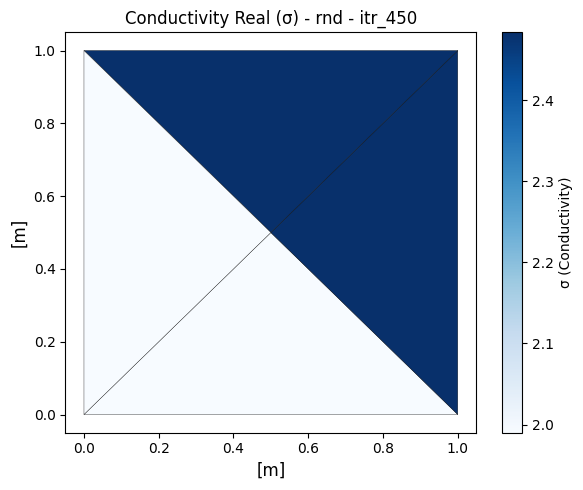

0.020371943181194715 - 0.002583180423345057 - 451
0.020368290459000373 - 0.0025826703740639725 - 452
0.020364649559816424 - 0.002582163213349671 - 453
0.0203610204420457 - 0.002581658924270177 - 454
0.02035740306425033 - 0.002581157487801308 - 455
0.020353797385151775 - 0.002580658886888361 - 456
0.020350203363630852 - 0.0025801631038527713 - 457
0.02034662095871824 - 0.002579670120699936 - 458
0.020343050129608856 - 0.0025791799210598126 - 459
0.020339490835642755 - 0.002578692486616384 - 460
0.020335943036325247 - 0.0025782078009865084 - 461
0.020332406691307852 - 0.00257772584692338 - 462
0.020328881760400704 - 0.0025772466072545804 - 463
0.02032536820356497 - 0.00257677006576118 - 464
0.020321865980914792 - 0.00257629620525447 - 465
0.02031837505271636 - 0.0025758250097924974 - 466
0.020314895379382195 - 0.0025753564622615333 - 467
0.020311426921483633 - 0.0025748905464133705 - 468
0.020307969639734566 - 0.0025744272460808885 - 469
0.020304523495003928 - 0.0025739665450290974 - 470

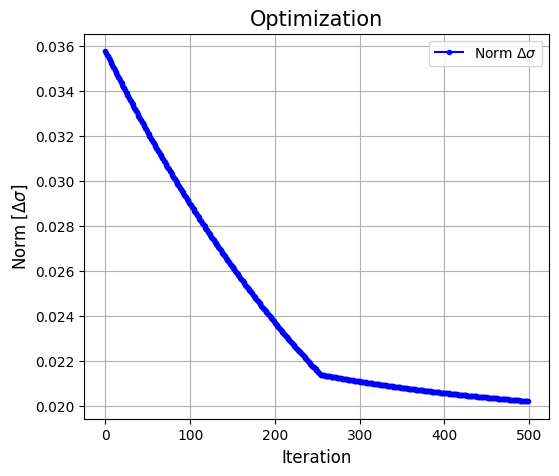

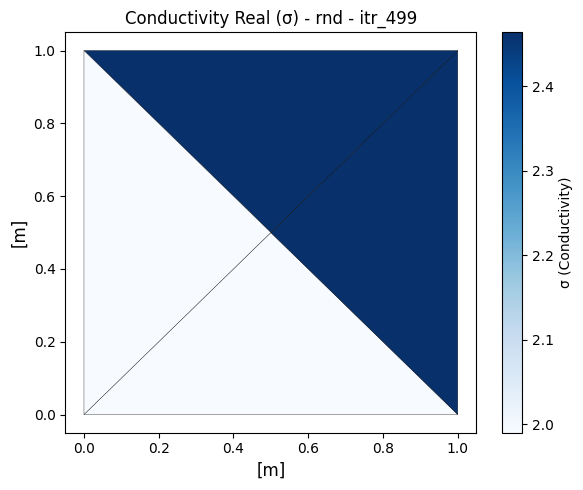

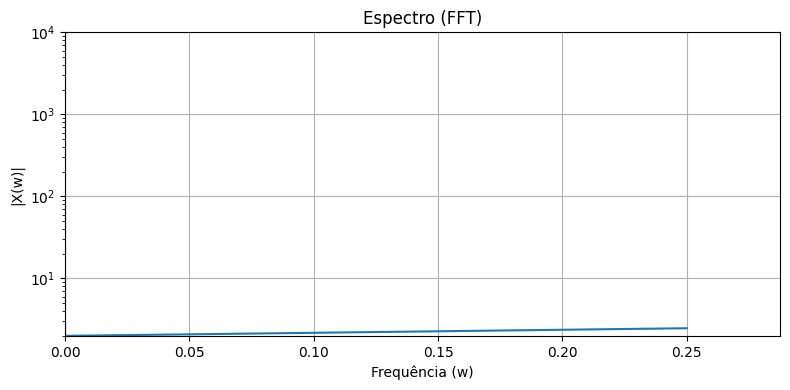

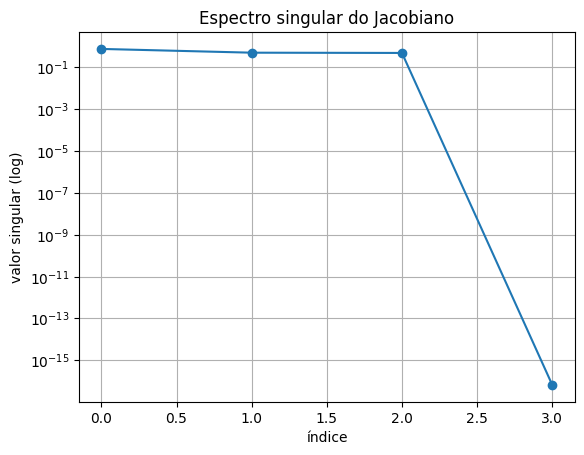

rank efetivo ~ 3 (tol=7.62961e-07)


In [5]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt


#######################################################
#nome = '../../malhasMSH/circ16_base_coarse.msh'
nome = '../../malhasMSH/quatro_base_22jan25.msh'
#nome = '../../malhasMSH/circ16_base_v2208.msh'
#nome = '../../malhasMSH/circ16_3_anomalia6_coarse_v2208.msh'

#nome = '../../malhasMSH/circ16_3_anomalia6_v2208.msh'

MinhaMalhaBase16 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
#MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
MinhaMalhaBase16.ReadMesh() 

#meus_sigmas = {1000 : 1.0}
meus_sigmas = {
1000 : 1.0,   
1001 : 1.0}#,
#1002 : 1.0,
#1003 : 1.0}

MinhaMalhaBase16.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaBase16.CalcKGlobal() # calculando KGlobal usando Sigmas


#print(f'MinhaMalhaPto2.KGlobal =  {MinhaMalhaBase16.KGlobal.shape}')
#PcorrenteBase = np.loadtxt("padrao128CC_392.txt")
fwd = forwardProblem.forward_problem(MinhaMalhaBase16, Pcorrente=None, SkipPattern=0, I =1.0e-3)   # __init__ roda aqui


#print(MinhaMalhaBase16.Elements[2])
#print(f"Centroid: {MinhaMalhaBase16.Elements[2].Centroid}")
#print(f"KGeo: \n{MinhaMalhaBase16.Elements[2].KGeo}")


#iteration= np.loadtxt("lastIteration.txt")
iteration=0

#sigma_inicial_rnd = np.random.uniform(2.6, 2.9, MinhaMalhaBase16.NumberOfElements)
#print('x0', sigma_inicial_rnd)


#sigma_inicial_cont = np.loadtxt("sigma_inicial_cont.txt")
invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalhaBase16, Pcorrente=fwd.corrente)
#invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalhaBase16, Pcorrente=PcorrenteBase)


#invProblem_2D.solve(V_measured,initialEstimate=sigma_inicial_rnd, alpha =0.1,  Lambda = 0.50, max_iter=3, Tol=1.0e-20, iteration=iteration)
invProblem_2D.solve(V_measured,initialEstimate=2.9, alpha =0.2500,  Lambda = 1.0e-3, max_iter=500, Tol=1.0e-20, iteration=iteration)
#print('Y_jacobian',invProblem.Y_jacobian)